In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
dataset = pd.read_excel("Superstore_USA.xlsx")

In [107]:
dataset.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


#Profit in Product Category

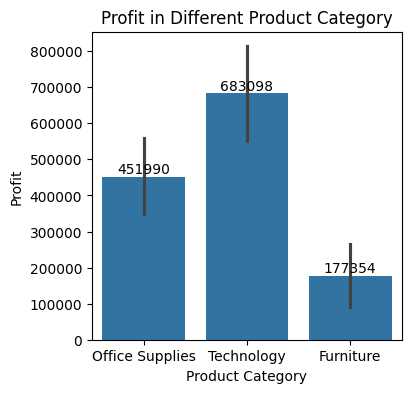

In [143]:
plt.figure(figsize = (4,4))
ax = sns.barplot(x="Product Category", y = "Profit", data = dataset, estimator = "sum")
ax.bar_label(ax.containers[0])
plt.title("Profit in Different Product Category")
plt.savefig("Profit in Different Product Category")
plt.show()

In [134]:
dataset["Order Year"] = dataset["Order Date"].dt.year

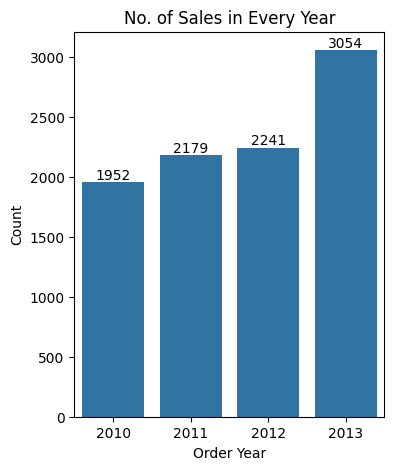

In [138]:
plt.figure(figsize = (4,5))
no_of_sales = sns.countplot(x = "Order Year", data = dataset)
no_of_sales.bar_label(no_of_sales.containers[0])
plt.title("No. of Sales in Every Year")
plt.ylabel("Count")
plt.savefig("No. of Sales in Every Year.jpg")
plt.show()

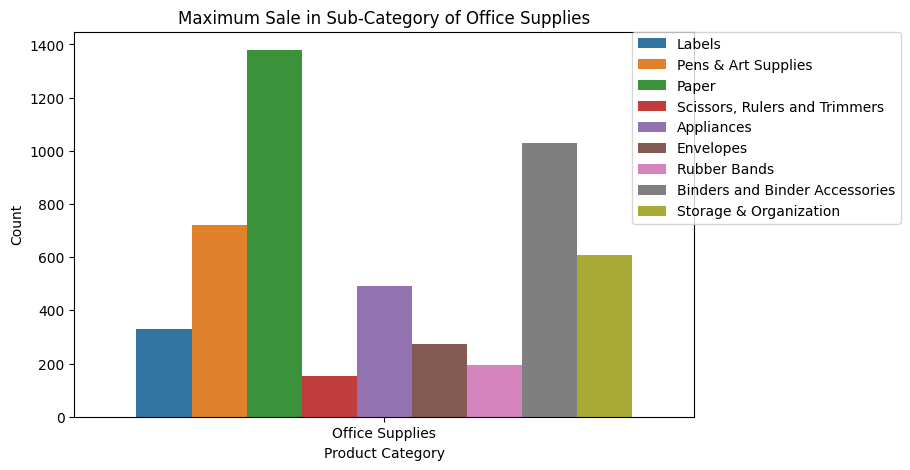

In [123]:
plt.figure(figsize = (8,5))
sns.countplot(x = "Product Category", data = dataset[dataset["Product Category"] == "Office Supplies"], hue = "Product Sub-Category")
plt.title("Maximum Sale in Sub-Category of Office Supplies")
plt.ylabel("Count")
plt.legend(loc=(0.9, 0.5))
plt.savefig("Maximum Sale in Sub-Category of Office Supplies")
plt.show()

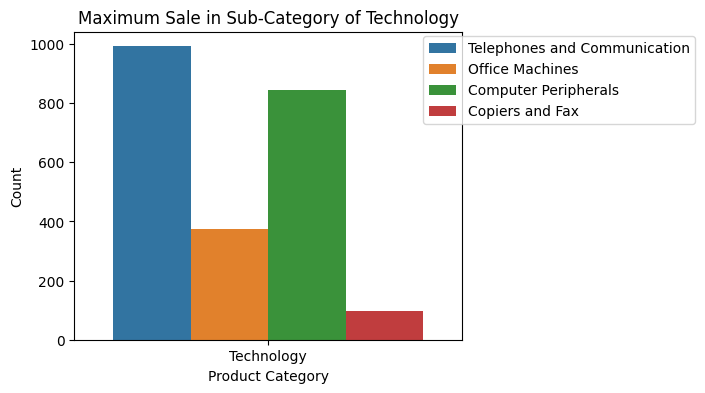

In [127]:
plt.figure(figsize = (5,4))
sns.countplot(x = "Product Category", data = dataset[dataset["Product Category"] == "Technology"], hue = "Product Sub-Category")
plt.title("Maximum Sale in Sub-Category of Technology")
plt.ylabel("Count")
plt.legend(loc=(0.9, 0.7))
plt.savefig("Maximum Sale in Sub-Category of Technology")
plt.show()

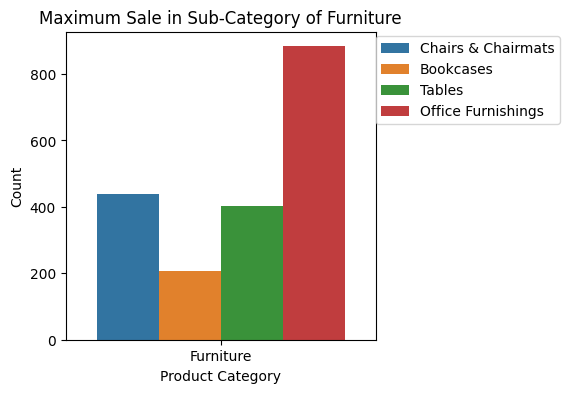

In [130]:
plt.figure(figsize = (4,4))
sns.countplot(x = "Product Category", data = dataset[dataset["Product Category"] == "Furniture"], hue = "Product Sub-Category")
plt.title("Maximum Sale in Sub-Category of Furniture")
plt.ylabel("Count")
plt.legend(loc=(1.0, 0.7))
plt.savefig("Maximum Sale in Sub-Category of Furniture")
plt.show()

# Customer Segment

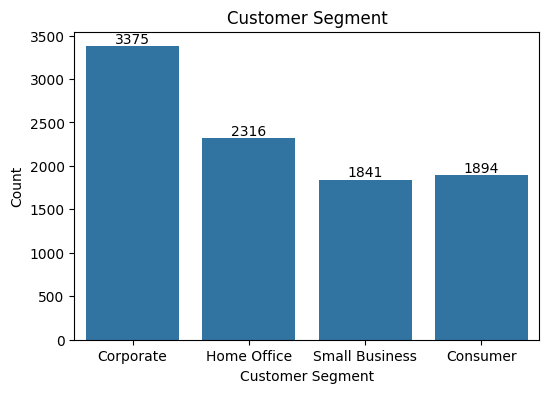

In [103]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = 'Customer Segment', data = dataset)
ax.bar_label(ax.containers[0])
plt.title("Customer Segment")
plt.savefig("Customer Segment.jpg")
plt.ylabel("Count")
plt.show()

# Product Category

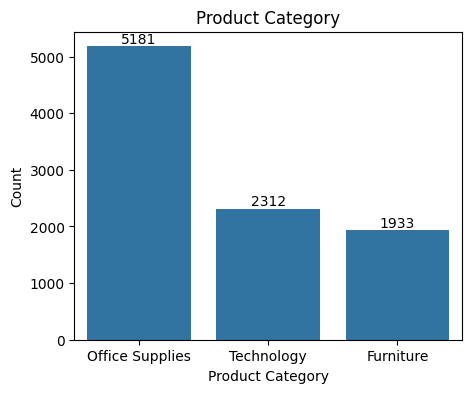

In [106]:
plt.figure(figsize = (5,4))
ax = sns.countplot(x = 'Product Category', data = dataset)
ax.bar_label(ax.containers[0])
plt.title("Product Category")
plt.savefig("Product Category.jpg")
plt.ylabel("Count")
plt.show()

In [5]:
dataset.shape

(9426, 24)

In [6]:
dataset.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [7]:
dataset["Product Base Margin"].fillna(dataset["Product Base Margin"].mean(), inplace = True)

C:\Users\Akash Kumar\AppData\Local\Temp\ipykernel_11060\2030144639.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Product Base Margin"].fillna(dataset["Product Base Margin"].mean(), inplace = True)


In [8]:
dataset["Order Priority"].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [9]:
dataset["Order Priority"].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [10]:
dataset["Order Priority"] = dataset["Order Priority"].replace("Critical ", "Critical")

# Order Priority (Univariate Analysis)

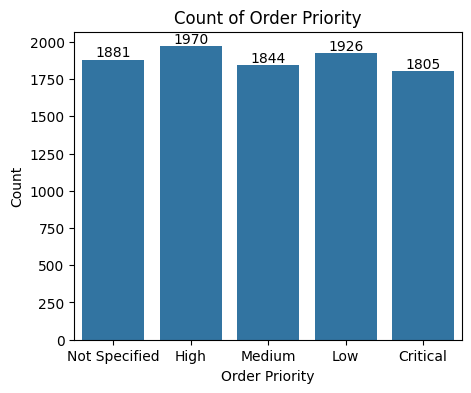

In [11]:
plt.figure(figsize = (5,4))
ax = sns.countplot(x = 'Order Priority', data = dataset)
ax.bar_label(ax.containers[0])
plt.title("Count of Order Priority")
plt.savefig("Count of Order Priority.jpg")
plt.ylabel("Count")
plt.show()

# Ship Mode 

In [12]:
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [37]:
x = dataset['Ship Mode'].value_counts().index
y = dataset['Ship Mode'].value_counts().values

print(x)
print(y)

Index(['Regular Air', 'Delivery Truck', 'Express Air'], dtype='object', name='Ship Mode')
[7036 1283 1107]


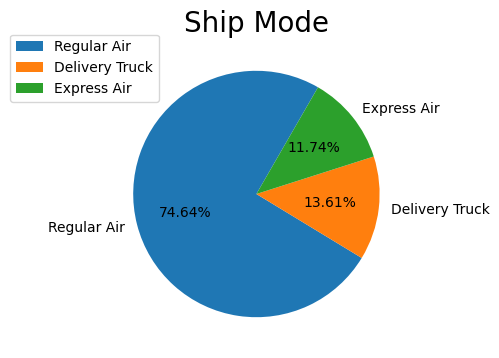

In [85]:
plt.figure(figsize = (5,4))
plt.pie(y, labels=x, autopct = "%0.2f%%", startangle = 60)
plt.legend(loc=(-0.3,0.8))
plt.title("Ship Mode", fontsize = 20)
plt.savefig("Ship Mode")
plt.show()

# Bivariate Analysis

#Product Category and Shipping Mode

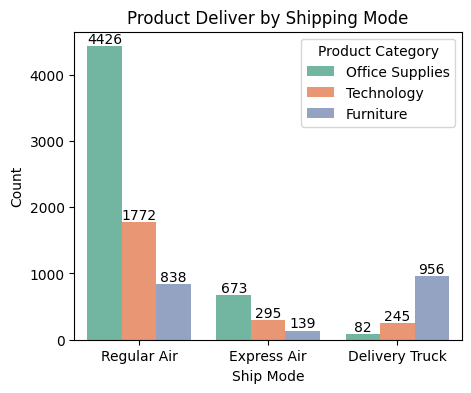

In [99]:
plt.figure(figsize = (5,4))
ax = sns.countplot(x = 'Ship Mode', data = dataset, hue = 'Product Category', palette = "Set2")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title("Product Deliver by Shipping Mode")
plt.ylabel("Count")
plt.savefig("Product Deliver by Shipping Mode")
plt.show()